In [122]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


## Other Libraries

In [123]:
import missingno
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mode 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import pickle

# Importing Dataset

In [124]:
train_df=pd.read_csv("/kaggle/input/titanic/train.csv")
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [125]:
test_df=pd.read_csv("/kaggle/input/titanic/test.csv")
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


# Exploratory Data Analysis

## Variable Identification and Preparation

### Variable Identification

#### Type of Variable

    Predictor
    
    Pclass	
    Name	
    Sex	
    Age	
    SibSp	
    Parch	
    Ticket	
    Fare	
    Cabin	
    Embarked

    Target Variable

    Survived

#### Datatype 

In [126]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### Variable Category

In [127]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [128]:
train_df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

    PassengerId      unique identifier
    Survived         categorical
    Pclass           categorical
    Name             unique identifier
    Sex              categorical
    Age              numerical
    SibSp            numerical
    Parch            numerical
    Ticket           categorical
    Fare             numerical
    Cabin            categorical
    Embarked         categorical

## Univariate Analysis & Data Cleansing

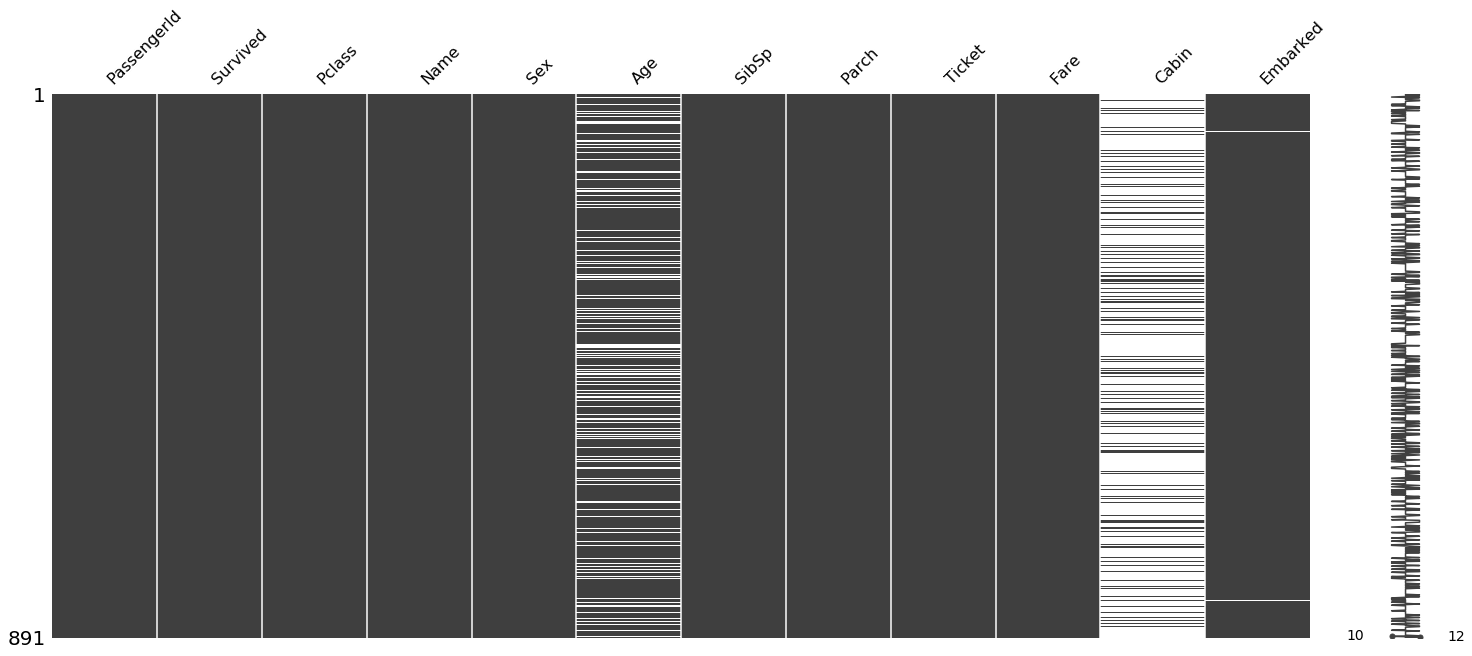

In [129]:
missingno.matrix(train_df)
plt.show()

### PassengerId

In [130]:
train_df.PassengerId

0        1
1        2
2        3
3        4
4        5
      ... 
886    887
887    888
888    889
889    890
890    891
Name: PassengerId, Length: 891, dtype: int64

In [131]:
train_df.PassengerId.isnull().sum()

0

### Survived

In [132]:
train_df.Survived

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [133]:
train_df.Survived.isnull().sum()

0

In [134]:
train_df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

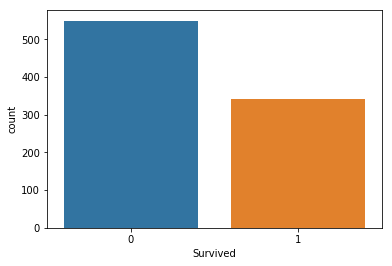

In [135]:
sns.countplot(train_df.Survived)
plt.show()

### Pclass

In [136]:
train_df.Pclass

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64

In [137]:
train_df.Pclass.isnull().sum()

0

In [138]:
test_df.Pclass.isnull().sum()

0

In [139]:
train_df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

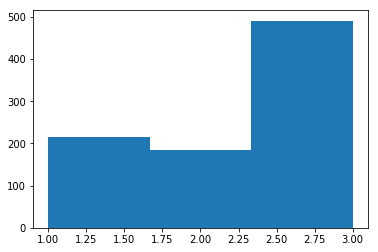

In [140]:
plt.hist(train_df.Pclass,bins=3)
plt.show()

### Name

In [141]:
train_df.Name

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [142]:
train_df.Name.isnull().sum()

0

In [143]:
train_df.Name.nunique()

891

### Sex

In [144]:
train_df.Sex

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

In [145]:
train_df.Sex.isnull().sum()

0

In [146]:
test_df.Sex.isnull().sum()

0

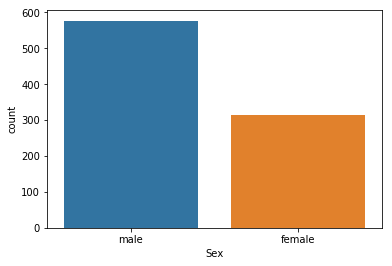

In [147]:
sns.countplot(train_df.Sex)
plt.show()

### Age

In [148]:
train_df.Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [149]:
train_df.Age.isnull().sum()

177

In [150]:
test_df.Age.isnull().sum()

86

In [151]:
mean_age=train_df.Age.mean()
train_df.Age=train_df.Age.fillna(mean_age)
test_df.Age=test_df.Age.fillna(mean_age)

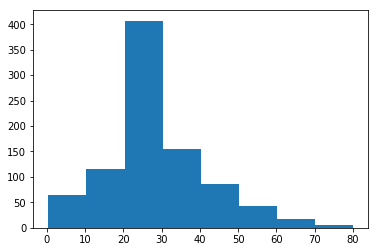

In [152]:
plt.hist(train_df.Age,bins=8)
plt.show()

### SibSp

In [153]:
train_df.SibSp

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    1
889    0
890    0
Name: SibSp, Length: 891, dtype: int64

In [154]:
train_df.SibSp.isnull().sum()

0

In [155]:
test_df.SibSp.isnull().sum()

0

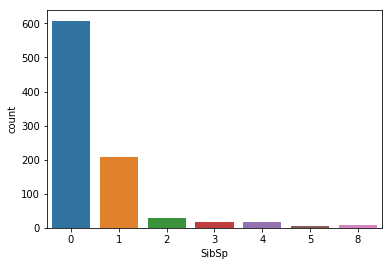

In [156]:
sns.countplot(train_df.SibSp)
plt.show()

### Parch

In [157]:
train_df.Parch

0      0
1      0
2      0
3      0
4      0
      ..
886    0
887    0
888    2
889    0
890    0
Name: Parch, Length: 891, dtype: int64

In [158]:
train_df.Parch.isnull().sum()

0

In [159]:
test_df.Parch.isnull().sum()

0

In [160]:
train_df.Parch.nunique()

7

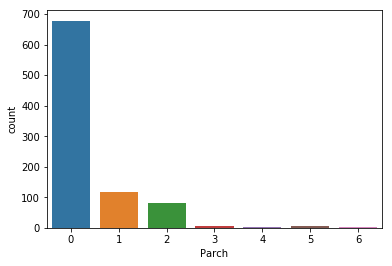

In [161]:
sns.countplot(train_df.Parch)
plt.show()

### Ticket

In [162]:
train_df.Ticket

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [163]:
train_df.Ticket.nunique()

681

### Fare

In [164]:
train_df.Fare

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

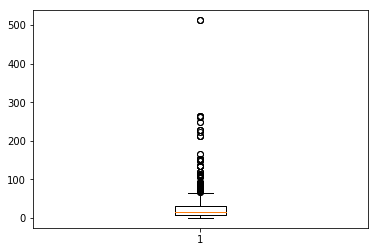

In [165]:
plt.boxplot(train_df.Fare)
plt.show()

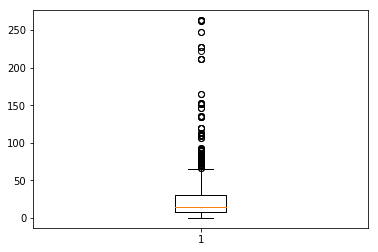

In [166]:
train_df2=train_df[train_df.Fare<300]
plt.boxplot(train_df2.Fare)
plt.show()

In [167]:
mean_fare=train_df.Fare.mean()
test_df.Fare=test_df.Fare.fillna(mean_fare)

### Cabin

In [168]:
train_df.Cabin

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [169]:
train_df.Cabin.isnull().sum()

687

In [170]:
train_df3=train_df2.iloc[:,[0,1,2,3,4,5,6,7,8,9,11]]

In [171]:
test_df=test_df.iloc[:,[0,1,2,3,4,5,6,7,8,10]]

### Embarked

In [172]:
train_df.Embarked

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [173]:
train_df3.Embarked=train_df3.Embarked.fillna("S")

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [174]:
test_df.Embarked=test_df.Embarked.fillna("S")

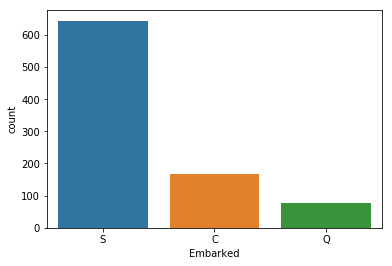

In [175]:
sns.countplot(train_df.Embarked)
plt.show()

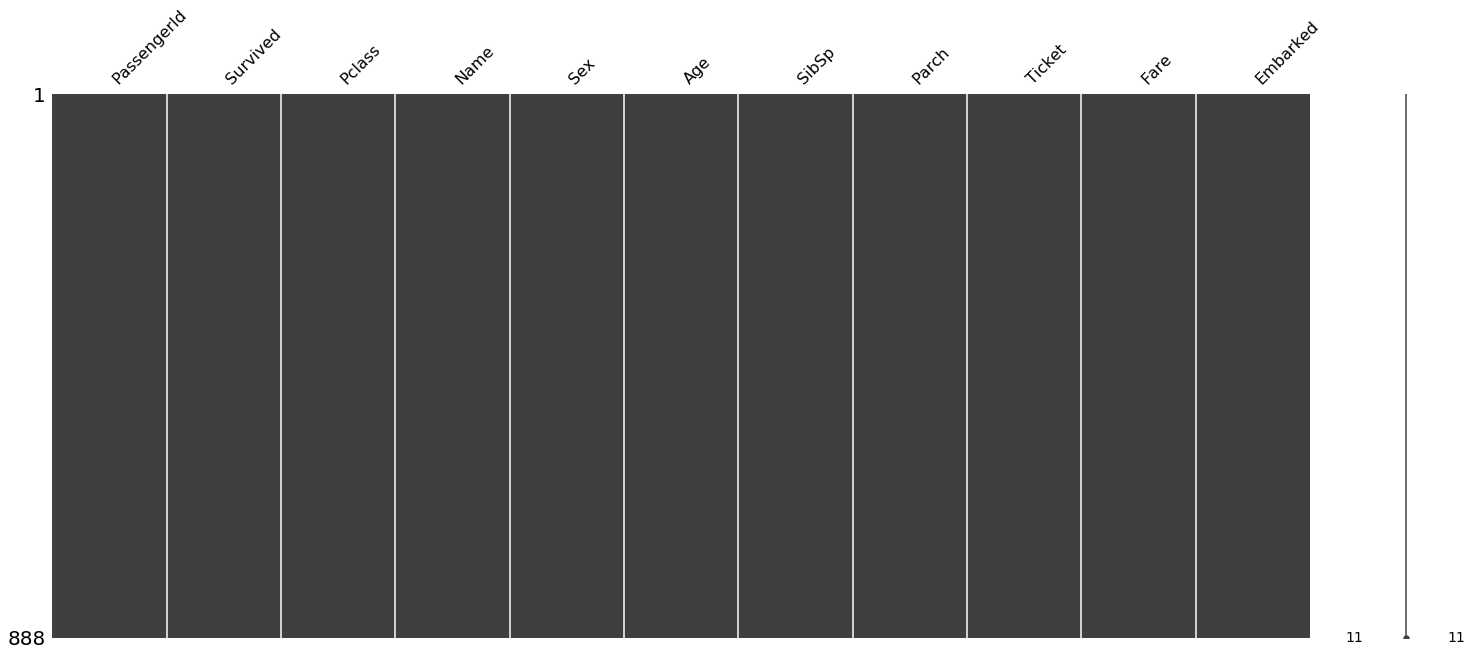

In [176]:
train_df=train_df3
missingno.matrix(train_df)
plt.show()

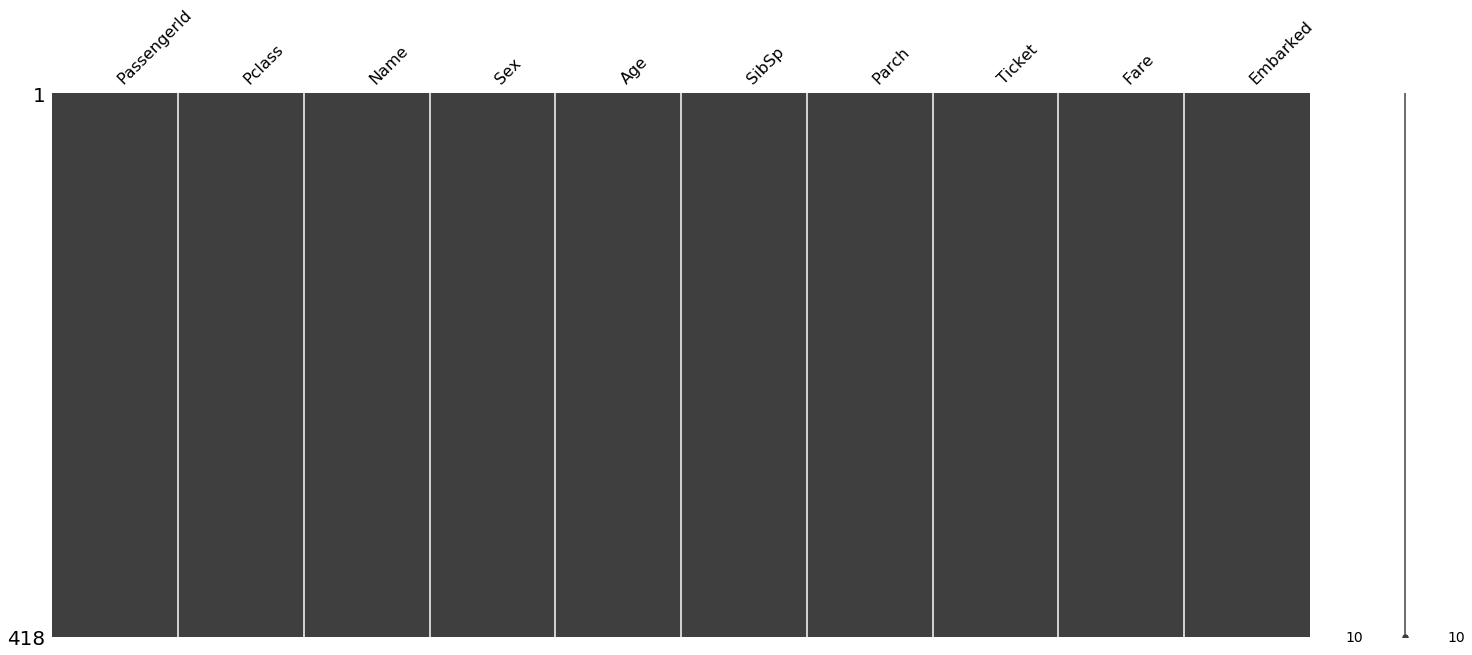

In [177]:
missingno.matrix(test_df)
plt.show()

## Bivariate Analysis

### Numerical vs Numerical

    Age
    SibSp       
    Parch       
    Fare

In [178]:
train_df[['Age','SibSp','Parch','Fare']].corr()

,Age,SibSp,Parch,Fare
Age,1.000000,-0.232092,-0.179336,0.093604
SibSp,-0.232092,1.000000,0.415141,0.211816
Parch,-0.179336,0.415141,1.000000,0.263910
Fare,0.093604,0.211816,0.263910,1.000000


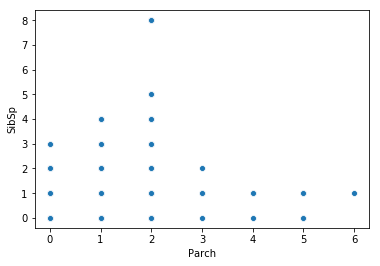

In [179]:
sns.scatterplot(train_df.Parch,train_df.SibSp)
plt.show()

### Numerical vs Categorical

    Numerical
        Age
        SibSp       
        Parch       
        Fare
    Categorical
        Survived
        Pclass
        Sex
        Ticket
        Embarked     

#### Age vs Survived

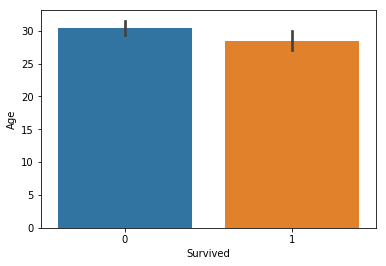

In [180]:
sns.barplot(train_df.Survived,train_df.Age)
plt.show()

#### Age vs Pclass 

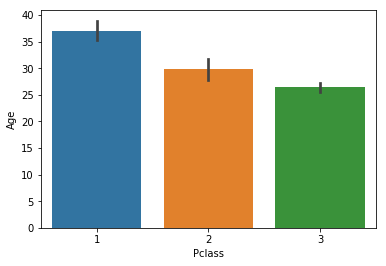

In [181]:
sns.barplot(train_df.Pclass,train_df.Age)
plt.show()

#### Age vs Sex

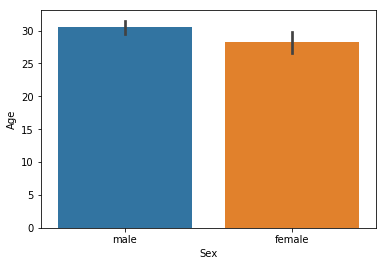

In [182]:
sns.barplot(train_df.Sex,train_df.Age)
plt.show()

#### Age vs Ticket

In [183]:
topTickets=pd.DataFrame(data=train_df.Ticket.value_counts()).iloc[:10,:]
topTickets

,Ticket
1601,7
CA. 2343,7
347082,7
CA 2144,6
3101295,6
347088,6
382652,5
S.O.C. 14879,5
347077,4
W./C. 6608,4


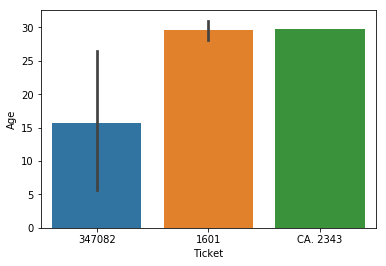

In [184]:
sns.barplot(train_df[(train_df.Ticket == "CA. 2343") | (train_df.Ticket == "347082")| (train_df.Ticket == "1601")].Ticket,train_df.Age)
plt.show()

#### Age vs Embarked

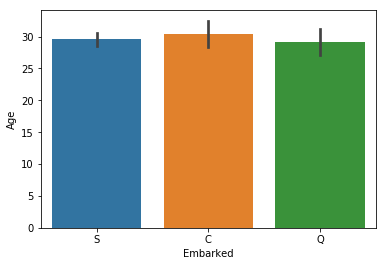

In [185]:
sns.barplot(train_df.Embarked,train_df.Age)
plt.show()

#### SibSp vs Survived

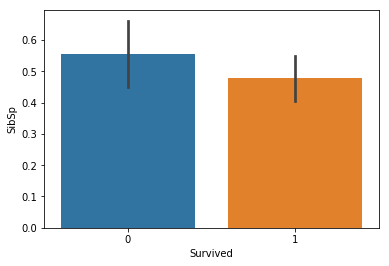

In [186]:
sns.barplot(train_df.Survived,train_df.SibSp)
plt.show()

#### SibSp vs Pclass

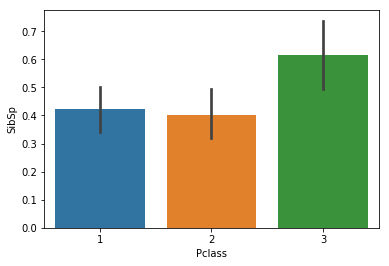

In [187]:
sns.barplot(train_df.Pclass,train_df.SibSp)
plt.show()

#### SibSp vs Sex

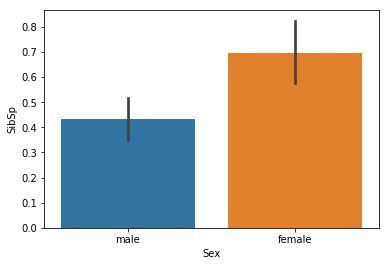

In [188]:
sns.barplot(train_df.Sex,train_df.SibSp)
plt.show()

#### SibSp vs Ticket

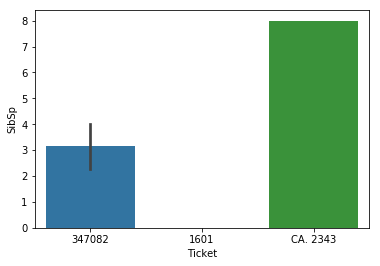

In [189]:
sns.barplot(train_df[(train_df.Ticket == "CA. 2343") | (train_df.Ticket == "347082")| (train_df.Ticket == "1601")].Ticket,train_df.SibSp)
plt.show()

#### SibSp vs Embarked

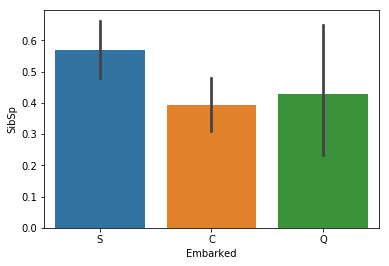

In [190]:
sns.barplot(train_df.Embarked,train_df.SibSp)
plt.show()

#### Parch vs Survived

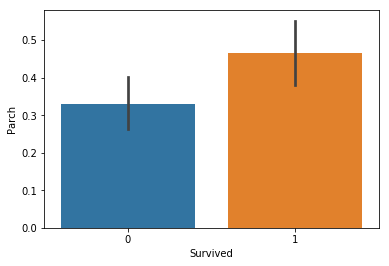

In [191]:
sns.barplot(train_df.Survived,train_df.Parch)
plt.show()

#### Parch vs Pclass

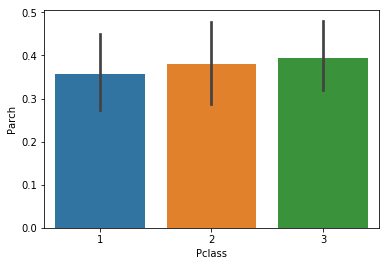

In [192]:
sns.barplot(train_df.Pclass,train_df.Parch)
plt.show()

#### Parch vs Sex

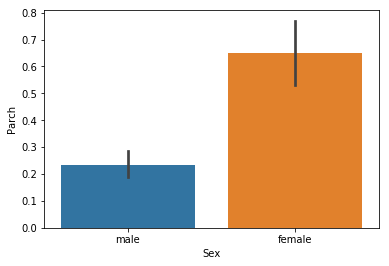

In [193]:
sns.barplot(train_df.Sex,train_df.Parch)
plt.show()

#### Parch vs Ticket

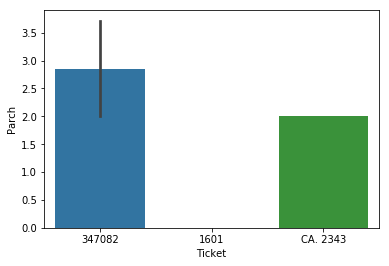

In [194]:
sns.barplot(train_df[(train_df.Ticket == "CA. 2343") | (train_df.Ticket == "347082")| (train_df.Ticket == "1601")].Ticket,train_df.Parch)
plt.show()

#### Parch vs Embarked

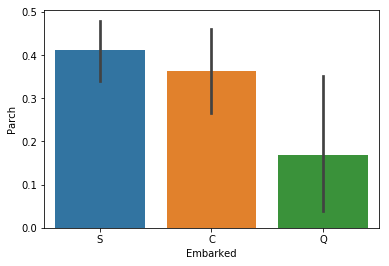

In [195]:
sns.barplot(train_df.Embarked,train_df.Parch)
plt.show()

#### Fare vs Survived

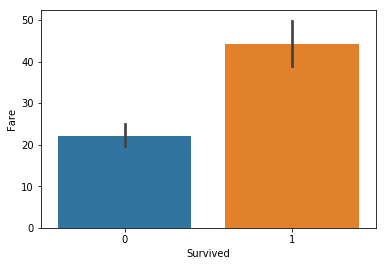

In [196]:
sns.barplot(train_df.Survived,train_df.Fare)
plt.show()

#### Fare vs Pclass

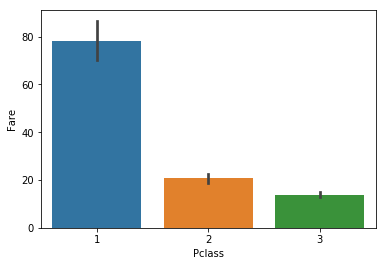

In [197]:
sns.barplot(train_df.Pclass,train_df.Fare)
plt.show()

#### Fare vs Sex

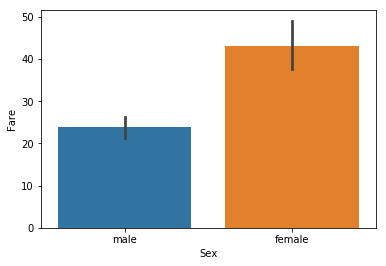

In [198]:
sns.barplot(train_df.Sex,train_df.Fare)
plt.show()

#### Fare vs Ticket

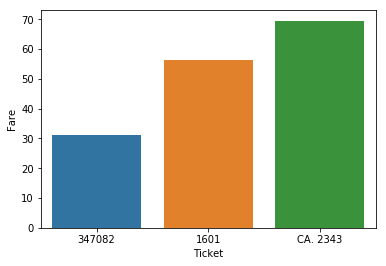

In [199]:
sns.barplot(train_df[(train_df.Ticket == "CA. 2343") | (train_df.Ticket == "347082")| (train_df.Ticket == "1601")].Ticket,train_df.Fare)
plt.show()

#### Fare vs Embarked

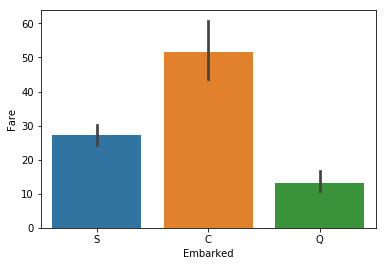

In [200]:
sns.barplot(train_df.Embarked,train_df.Fare)
plt.show()

## Feature Engineering

### Encoding Categorical Values

    Categorical
        Survived - Already encoded
        Pclass
        Sex
        Ticket
        Embarked   

In [201]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.500000,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000000,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.000000,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.000000,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000000,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,29.699118,0,0,A.5. 3236,8.0500,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,3,"Ware, Mr. Frederick",male,29.699118,0,0,359309,8.0500,S


In [202]:
encoder_pclass=LabelEncoder()
train_df.Pclass=encoder_pclass.fit_transform(train_df.Pclass)
test_df.Pclass = encoder_pclass.transform(test_df.Pclass)

In [203]:
encoder_sex=LabelEncoder()
train_df.Sex=encoder_sex.fit_transform(train_df.Sex)
test_df.Sex=encoder_sex.transform(test_df.Sex)

In [204]:
encoder_ticket=LabelEncoder()
train_df.Ticket=encoder_ticket.fit_transform(train_df.Ticket)

In [205]:
encoder_embarked=LabelEncoder()
train_df.Embarked=encoder_embarked.fit_transform(train_df.Embarked)
test_df.Embarked=encoder_embarked.fit_transform(test_df.Embarked)

### Standardizing Continuous Values

    Age
    SibSp       
    Parch       
    Fare

In [206]:
scaler_age=MinMaxScaler()
train_df[['Age','SibSp','Parch','Fare']]=scaler_age.fit_transform(train_df[['Age','SibSp','Parch','Fare']])
test_df[['Age','SibSp','Parch','Fare']]=scaler_age.transform(test_df[['Age','SibSp','Parch','Fare']])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydat

In [207]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,2,"Braund, Mr. Owen Harris",1,0.271174,0.125,0.000000,523,0.027567,2
1,2,1,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0.472229,0.125,0.000000,596,0.271039,0
2,3,1,2,"Heikkinen, Miss. Laina",0,0.321438,0.000,0.000000,668,0.030133,2
3,4,1,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.434531,0.125,0.000000,49,0.201901,2
4,5,0,2,"Allen, Mr. William Henry",1,0.434531,0.000,0.000000,472,0.030608,2
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,1,"Montvila, Rev. Juozas",1,0.334004,0.000,0.000000,101,0.049430,2
887,888,1,0,"Graham, Miss. Margaret Edith",0,0.233476,0.000,0.000000,14,0.114068,2
888,889,0,2,"Johnston, Miss. Catherine Helen ""Carrie""",0,0.367921,0.125,0.333333,674,0.089163,2
889,890,1,0,"Behr, Mr. Karl Howell",1,0.321438,0.000,0.000000,8,0.114068,0


In [208]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,2,"Kelly, Mr. James",1,0.428248,0.000,0.000000,330911,0.029769,1
1,893,2,"Wilkes, Mrs. James (Ellen Needs)",0,0.585323,0.125,0.000000,363272,0.026616,2
2,894,1,"Myles, Mr. Thomas Francis",1,0.773813,0.000,0.000000,240276,0.036835,1
3,895,2,"Wirz, Mr. Albert",1,0.334004,0.000,0.000000,315154,0.032937,2
4,896,2,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,0.271174,0.125,0.166667,3101298,0.046721,2
...,...,...,...,...,...,...,...,...,...,...
413,1305,2,"Spector, Mr. Woolf",1,0.367921,0.000,0.000000,A.5. 3236,0.030608,2
414,1306,0,"Oliva y Ocana, Dona. Fermina",0,0.484795,0.000,0.000000,PC 17758,0.414068,0
415,1307,2,"Saether, Mr. Simon Sivertsen",1,0.478512,0.000,0.000000,SOTON/O.Q. 3101262,0.027567,2
416,1308,2,"Ware, Mr. Frederick",1,0.367921,0.000,0.000000,359309,0.030608,2


### One Hot Encoding

#### Pclass

In [209]:
pclass_df=pd.get_dummies(train_df.Pclass)
pclass_df.columns=['Pclass_1','Pclass_2','Pclass_3']
train_df['Pclass1']=pclass_df.Pclass_1
train_df['Pclass2']=pclass_df.Pclass_2
train_df=train_df.drop('Pclass',axis=1)
train_df.head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Pclass1,Pclass2
0,1,0,"Braund, Mr. Owen Harris",1,0.271174,0.125,0.0,523,0.027567,2,0,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0.472229,0.125,0.0,596,0.271039,0,1,0
2,3,1,"Heikkinen, Miss. Laina",0,0.321438,0.000,0.0,668,0.030133,2,0,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.434531,0.125,0.0,49,0.201901,2,1,0
4,5,0,"Allen, Mr. William Henry",1,0.434531,0.000,0.0,472,0.030608,2,0,0


In [210]:
pclass_df=pd.get_dummies(test_df.Pclass)
pclass_df.columns=['Pclass_1','Pclass_2','Pclass_3']
test_df['Pclass1']=pclass_df.Pclass_1
test_df['Pclass2']=pclass_df.Pclass_2
test_df=test_df.drop('Pclass',axis=1)
test_df.head()

,PassengerId,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Pclass1,Pclass2
0,892,"Kelly, Mr. James",1,0.428248,0.000,0.000000,330911,0.029769,1,0,0
1,893,"Wilkes, Mrs. James (Ellen Needs)",0,0.585323,0.125,0.000000,363272,0.026616,2,0,0
2,894,"Myles, Mr. Thomas Francis",1,0.773813,0.000,0.000000,240276,0.036835,1,0,1
3,895,"Wirz, Mr. Albert",1,0.334004,0.000,0.000000,315154,0.032937,2,0,0
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,0.271174,0.125,0.166667,3101298,0.046721,2,0,0


#### Embarked

In [211]:
embarked_df=pd.get_dummies(train_df.Embarked)
embarked_df.columns=['Embarked_S','Embarked_C','Embarked_Q']
train_df['Embarked_S']=embarked_df['Embarked_S']
train_df['Embarked_C']=embarked_df['Embarked_C']
train_df=train_df.drop('Embarked',axis=1)
train_df

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Pclass1,Pclass2,Embarked_S,Embarked_C
0,1,0,"Braund, Mr. Owen Harris",1,0.271174,0.125,0.000000,523,0.027567,0,0,0,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0.472229,0.125,0.000000,596,0.271039,1,0,1,0
2,3,1,"Heikkinen, Miss. Laina",0,0.321438,0.000,0.000000,668,0.030133,0,0,0,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.434531,0.125,0.000000,49,0.201901,1,0,0,0
4,5,0,"Allen, Mr. William Henry",1,0.434531,0.000,0.000000,472,0.030608,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",1,0.334004,0.000,0.000000,101,0.049430,0,1,0,0
887,888,1,"Graham, Miss. Margaret Edith",0,0.233476,0.000,0.000000,14,0.114068,1,0,0,0
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",0,0.367921,0.125,0.333333,674,0.089163,0,0,0,0
889,890,1,"Behr, Mr. Karl Howell",1,0.321438,0.000,0.000000,8,0.114068,1,0,1,0


In [212]:
embarked_df=pd.get_dummies(test_df.Embarked)
embarked_df.columns=['Embarked_S','Embarked_C','Embarked_Q']
test_df['Embarked_S']=embarked_df['Embarked_S']
test_df['Embarked_C']=embarked_df['Embarked_C']
test_df=test_df.drop('Embarked',axis=1)
test_df

,PassengerId,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Pclass1,Pclass2,Embarked_S,Embarked_C
0,892,"Kelly, Mr. James",1,0.428248,0.000,0.000000,330911,0.029769,0,0,0,1
1,893,"Wilkes, Mrs. James (Ellen Needs)",0,0.585323,0.125,0.000000,363272,0.026616,0,0,0,0
2,894,"Myles, Mr. Thomas Francis",1,0.773813,0.000,0.000000,240276,0.036835,0,1,0,1
3,895,"Wirz, Mr. Albert",1,0.334004,0.000,0.000000,315154,0.032937,0,0,0,0
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,0.271174,0.125,0.166667,3101298,0.046721,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,"Spector, Mr. Woolf",1,0.367921,0.000,0.000000,A.5. 3236,0.030608,0,0,0,0
414,1306,"Oliva y Ocana, Dona. Fermina",0,0.484795,0.000,0.000000,PC 17758,0.414068,1,0,1,0
415,1307,"Saether, Mr. Simon Sivertsen",1,0.478512,0.000,0.000000,SOTON/O.Q. 3101262,0.027567,0,0,0,0
416,1308,"Ware, Mr. Frederick",1,0.367921,0.000,0.000000,359309,0.030608,0,0,0,0


In [213]:
train_df=train_df.drop('Ticket',axis=1)
train_df.head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Fare,Pclass1,Pclass2,Embarked_S,Embarked_C
0,1,0,"Braund, Mr. Owen Harris",1,0.271174,0.125,0.0,0.027567,0,0,0,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0.472229,0.125,0.0,0.271039,1,0,1,0
2,3,1,"Heikkinen, Miss. Laina",0,0.321438,0.000,0.0,0.030133,0,0,0,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.434531,0.125,0.0,0.201901,1,0,0,0
4,5,0,"Allen, Mr. William Henry",1,0.434531,0.000,0.0,0.030608,0,0,0,0


In [214]:
test_df=test_df.drop('Ticket',axis=1)
test_df.head()

,PassengerId,Name,Sex,Age,SibSp,Parch,Fare,Pclass1,Pclass2,Embarked_S,Embarked_C
0,892,"Kelly, Mr. James",1,0.428248,0.000,0.000000,0.029769,0,0,0,1
1,893,"Wilkes, Mrs. James (Ellen Needs)",0,0.585323,0.125,0.000000,0.026616,0,0,0,0
2,894,"Myles, Mr. Thomas Francis",1,0.773813,0.000,0.000000,0.036835,0,1,0,1
3,895,"Wirz, Mr. Albert",1,0.334004,0.000,0.000000,0.032937,0,0,0,0
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,0.271174,0.125,0.166667,0.046721,0,0,0,0


In [215]:
train_df=train_df.drop('Name',axis=1)
train_df.head()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Pclass1,Pclass2,Embarked_S,Embarked_C
0,1,0,1,0.271174,0.125,0.0,0.027567,0,0,0,0
1,2,1,0,0.472229,0.125,0.0,0.271039,1,0,1,0
2,3,1,0,0.321438,0.000,0.0,0.030133,0,0,0,0
3,4,1,0,0.434531,0.125,0.0,0.201901,1,0,0,0
4,5,0,1,0.434531,0.000,0.0,0.030608,0,0,0,0


In [216]:
test_df=test_df.drop('Name',axis=1)
test_df.head()

,PassengerId,Sex,Age,SibSp,Parch,Fare,Pclass1,Pclass2,Embarked_S,Embarked_C
0,892,1,0.428248,0.000,0.000000,0.029769,0,0,0,1
1,893,0,0.585323,0.125,0.000000,0.026616,0,0,0,0
2,894,1,0.773813,0.000,0.000000,0.036835,0,1,0,1
3,895,1,0.334004,0.000,0.000000,0.032937,0,0,0,0
4,896,0,0.271174,0.125,0.166667,0.046721,0,0,0,0


In [217]:
train_df=train_df.set_index('PassengerId')
test_df=test_df.set_index('PassengerId')

# Splitting Train and Test Data

In [218]:
X=train_df.iloc[:,1:]
Y=train_df.iloc[:,0]

In [219]:
train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=0.2)

# Model Building

## Logistic Regression

In [220]:
classifier=LogisticRegression()
classifier.fit(train_X,train_Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [221]:
pred_Y=classifier.predict(test_X)

#### Model Evaluation

In [222]:
accuracy_score(pred_Y,test_Y)

0.8146067415730337

## Support Vector Classifier

In [223]:
best_classifier=SVC()
best_classifier.fit(train_X,train_Y)
pred_Y=best_classifier.predict(test_X)

#### Model Evaluation

In [224]:
    accuracy_score(pred_Y,test_Y)

0.8314606741573034

## Stochastic Gradient

In [225]:
classifier=SGDClassifier()
classifier.fit(train_X,train_Y)
pred_Y=classifier.predict(test_X)

#### Model Evaluation

In [226]:
accuracy_score(pred_Y,test_Y)

0.8033707865168539

## Nearest Neighbors

In [227]:
classifier=KNeighborsClassifier()
classifier.fit(train_X,train_Y)
pred_Y=classifier.predict(test_X)

#### Model Evaluation

In [228]:
accuracy_score(pred_Y,test_Y)

0.8258426966292135

## Gaussian Process

In [229]:
classifier=GaussianProcessClassifier()
classifier.fit(train_X,train_Y)
pred_Y=classifier.predict(test_X)

#### Model Evaluation

In [230]:
accuracy_score(pred_Y,test_Y)

0.8314606741573034

## Gaussian Naive Bayes

In [231]:
classifier=GaussianNB()
classifier.fit(train_X,train_Y)
pred_Y=classifier.predict(test_X)

#### Model Evaluation

In [232]:
accuracy_score(pred_Y,test_Y)

0.8089887640449438

## Decision Tree

In [233]:
classifier=DecisionTreeClassifier()
classifier.fit(train_X,train_Y)
pred_Y=classifier.predict(test_X)

#### Model Evaluation

In [234]:
accuracy_score(pred_Y,test_Y)

0.7303370786516854

### Best Classifier is K nearest neighbour

## Prediction on Test Data

In [235]:
X=train_df.iloc[:,1:]
Y=train_df.iloc[:,0]

In [236]:
X.headne()

,Sex,Age,SibSp,Parch,Fare,Pclass1,Pclass2,Embarked_S,Embarked_C
PassengerId,,,,,,,,,
1,1,0.271174,0.125,0.0,0.027567,0,0,0,0
2,0,0.472229,0.125,0.0,0.271039,1,0,1,0
3,0,0.321438,0.000,0.0,0.030133,0,0,0,0
4,0,0.434531,0.125,0.0,0.201901,1,0,0,0
5,1,0.434531,0.000,0.0,0.030608,0,0,0,0


In [237]:
test_df.head()

,Sex,Age,SibSp,Parch,Fare,Pclass1,Pclass2,Embarked_S,Embarked_C
PassengerId,,,,,,,,,
892,1,0.428248,0.000,0.000000,0.029769,0,0,0,1
893,0,0.585323,0.125,0.000000,0.026616,0,0,0,0
894,1,0.773813,0.000,0.000000,0.036835,0,1,0,1
895,1,0.334004,0.000,0.000000,0.032937,0,0,0,0
896,0,0.271174,0.125,0.166667,0.046721,0,0,0,0


In [238]:
Y.head()

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

In [239]:
best_classifier.fit(X,Y)
pred_Y=best_classifier.predict(test_df)

 # Preparing for deployment

In [240]:
filename = 'finalized_model.sav'
pickle.dump(best_classifier, open(filename, 'wb'))

In [241]:
model = pickle.load(open(filename, 'rb'))
pred_Y = model.predict(test_df)


In [242]:
test_df['Survived']=pred_Y
test_df.head()

,Sex,Age,SibSp,Parch,Fare,Pclass1,Pclass2,Embarked_S,Embarked_C,Survived
PassengerId,,,,,,,,,,
892,1,0.428248,0.000,0.000000,0.029769,0,0,0,1,0
893,0,0.585323,0.125,0.000000,0.026616,0,0,0,0,0
894,1,0.773813,0.000,0.000000,0.036835,0,1,0,1,0
895,1,0.334004,0.000,0.000000,0.032937,0,0,0,0,0
896,0,0.271174,0.125,0.166667,0.046721,0,0,0,0,0
